# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [15]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [16]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [17]:
# Récupération du contenu du fichier
path = "../tp4/all/all.txt"
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

In [18]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

14194332 words found


In [19]:
words[:10]

[".'■", 'HE', '!', 'WW', ".'", 'i', 'I', 'MMlll', 'l', 'Wil']

## Calculer la taille du vocabulaire

In [20]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

5084532 words kept (457869 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [21]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('rue', 14199),
 ('ans', 10303),
 ('bruxelles', 10094),
 ('très', 9283),
 ('grand', 8534),
 ('heures', 8496),
 ('leurs', 7876),
 ('peu', 7787),
 ('prix', 7666),
 ('temps', 7563)]

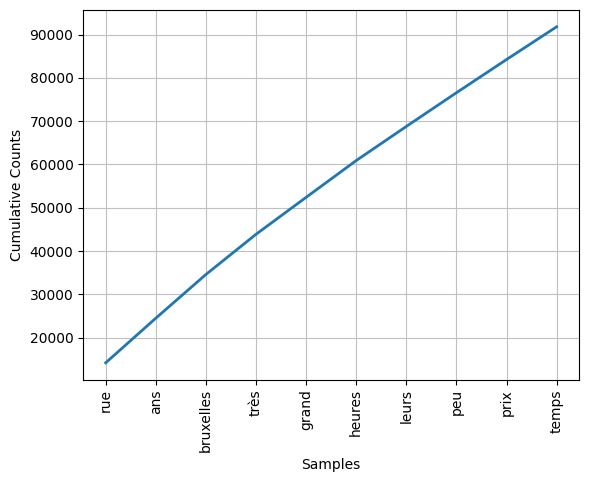

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [22]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [23]:
fdist.hapaxes()[:30]

['mmlll',
 'tmtmw',
 'wiiot',
 'ttiipiffi',
 'vnsoelea',
 'tooêpbé',
 'rlérido',
 'totée',
 'iioii',
 'ôbro',
 'prévaricateur',
 'démasquée',
 'tohéha',
 'ausso',
 'révooation',
 'judieaires',
 'malheurcaix',
 'sorvile',
 'concussionnaire',
 'dénonceront',
 'jrstico',
 'aooompojraé',
 'dtsconto',
 'appmséa',
 'pinances',
 'commtri',
 'qjé',
 'eauso',
 'ristournés',
 'toumo']

## Trouver les mots les plus longs du corpus

In [24]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiuiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiililiiiiiiiiiiiiiiiiiiiiii',
 'lllllllllllllllllllllllilillllllllllllllllllllllllillllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllilllllllllllllllllllllllllllllllllllllm',
 'llllllülilllllllllllllllllllllllllllllllllllllllllllllilllllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllulllllllllllllllllllllllllli',
 'lllllllllllllllllillllllllllllllllllllllmiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiiiiiiiiii',
 'illlllllllllllllilllillllltlllltllllllllllllllllllellllllllllllllllllllllelllllllllllllltllllllllltilltllllllllllllllllllllllllllllllllllllllllllllllllllll',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii